## 3. Import the required packages with their customary aliases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 4. Use the %matplotlib inline magic command so that your plots show in the notebook without having to call plt.show() every time.

In [2]:
#%matplotlib inline

## 5. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv", nrows=6869)

In [4]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


## 6. Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4496)

In [6]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


## 7. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6869, 4)

In [8]:
internet_df.shape

(4496, 4)

## 8. Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

## 9. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,Footnote,NaN,NaN


## 10. Drop the value footnotes column from both DataFrames. Check that this worked as expected.

In [13]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [14]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [15]:
internet_df.drop('Value Footnotes', axis=1, inplace=True)

In [16]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


## 11. Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [17]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [18]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


## 12. Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [20]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [21]:
internet_df.shape

(4496, 3)

## 13. Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use.

In [22]:
#concatenate
gdp_and_internet_use = pd.concat([gdp_df, internet_df], axis=0)

In [23]:
#groupby to remove (most) nans and combine rows
#https://stackoverflow.com/questions/17679089/pandas-dataframe-groupby-two-columns-and-get-counts
#https://stackoverflow.com/questions/49034202/pandas-dataframe-merging-rows-to-remove-nan
gdp_and_internet_use = gdp_and_internet_use.groupby(['Country', 'Year']).first().reset_index()

In [24]:
gdp_and_internet_use.shape

(7906, 4)

## 14. Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [25]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,1990,NaN,0.000000
1,Afghanistan,2001,NaN,0.004723
2,Afghanistan,2002,1189.784878,0.004561
3,Afghanistan,2003,1235.810063,0.087891
4,Afghanistan,2004,1200.278256,0.105809


## 15. Look at the last five rows to make sure the data is clean and as expected.

In [26]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7901,Zimbabwe,2016,2934.733650,NaN
7902,Zimbabwe,2017,3028.245976,NaN
7903,Zimbabwe,2018,3130.029501,NaN
7904,Zimbabwe,2019,2835.948532,NaN
7905,footnoteSeqID,Footnote,NaN,NaN


## 16. Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [27]:
filter1 = gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])

In [28]:
gdp_and_internet_use = gdp_and_internet_use[filter1]

In [29]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
9,Afghanistan,2009,1758.904043,3.550000
14,Afghanistan,2014,2102.385234,6.390000
34,Albania,2004,7604.838002,2.420388
39,Albania,2009,10346.864199,41.200000


In [30]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7864,Zambia,2009,2917.516220,6.310000
7869,Zambia,2014,3450.046561,17.340000
7889,Zimbabwe,2004,2480.859342,6.564045
7894,Zimbabwe,2009,1925.364381,11.360000
7899,Zimbabwe,2014,2955.240287,19.890000


## 17. Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [31]:
filter2004 = gdp_and_internet_use['Year'].isin(['2004'])
gdp_internet_2004 = gdp_and_internet_use[filter2004]

In [32]:
gdp_internet_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
34,Albania,2004,7604.838002,2.420388
64,Algeria,2004,10058.435939,4.634475
89,Andorra,2004,NaN,26.837954
114,Angola,2004,5593.241537,0.464815


In [33]:
filter2009 = gdp_and_internet_use['Year'].isin(['2009'])
gdp_internet_2009 = gdp_and_internet_use[filter2009]

In [34]:
gdp_internet_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1758.904043,3.55
39,Albania,2009,10346.864199,41.20
69,Algeria,2009,10782.361398,11.23
94,Andorra,2009,NaN,78.53
119,Angola,2009,7643.493749,6.00


In [35]:
filter2014 = gdp_and_internet_use['Year'].isin(['2014'])
gdp_internet_2014 = gdp_and_internet_use[filter2014]

In [36]:
gdp_internet_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2102.385234,6.39
44,Albania,2014,11623.866679,60.10
74,Algeria,2014,11512.705405,18.09
99,Andorra,2014,NaN,95.90
124,Angola,2014,8239.828837,21.26


## 18. Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

### Answer: Iceland (98.16%)

In [37]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3249,Iceland,2014,49652.1495,98.16


## 19. Which country had the lowest percentage of internet users in 2014? What was the percentage?

### Answer: Dem. People's Rep. of Korea (0.0%)

In [38]:
gdp_internet_2014.loc[gdp_internet_2014['Internet_Users_Pct'] == gdp_internet_2014['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1645,Dem. People's Rep. of Korea,2014,NaN,0.0


## 20. Repeat for 2004 and 2009.

### 2004 Answers: Sweden (83.89%); Dem. People's Rep. of Korea (0.0%)

In [39]:
#2004 max internet usage
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6849,Sweden,2004,44496.023401,83.89


In [40]:
#2004 min internet usage
gdp_internet_2004.loc[gdp_internet_2004['Internet_Users_Pct'] == gdp_internet_2004['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1636,Dem. People's Rep. of Korea,2004,NaN,0.0


### 2009 Answers: Iceland (93.0%); Dem. People's Rep. of Korea (0.0%)

In [41]:
#2009 max internet usage
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3244,Iceland,2009,48177.084123,93.0


In [42]:
#2009 min internet usage
gdp_internet_2009.loc[gdp_internet_2009['Internet_Users_Pct'] == gdp_internet_2009['Internet_Users_Pct'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1641,Dem. People's Rep. of Korea,2009,NaN,0.0


## 21. Which country had the highest gdp per capita in 2014? What was the gdp per capita?

### Answer: Macao SAR, China (156,514.13385)

In [43]:
#2014 max gdp
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].max()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4349,"Macao SAR, China",2014,156514.13385,NaN


## 22. Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

### Answer: Central African Republic (822.610458)

In [44]:
#2014 min gdp
gdp_internet_2014.loc[gdp_internet_2014['GDP_Per_Capita'] == gdp_internet_2014['GDP_Per_Capita'].min()]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1182,Central African Republic,2014,822.610458,NaN


## 23. Create some scatterplots:

### a. 2004 Percent Using the Internet vs GDP Per Capita

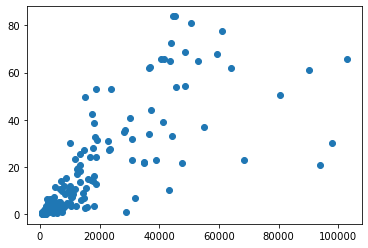

In [45]:
plt.scatter(gdp_internet_2004.GDP_Per_Capita, gdp_internet_2004.Internet_Users_Pct)

### b. 2009 Percent Using the Internet vs GDP Per Capita

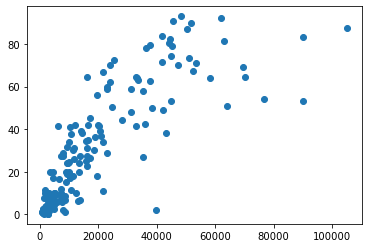

In [46]:
plt.scatter(gdp_internet_2009.GDP_Per_Capita, gdp_internet_2009.Internet_Users_Pct)

### c. 2014 Percent Using the Internet vs GDP Per Capita

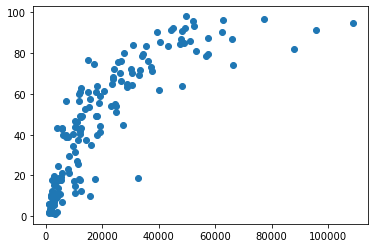

In [47]:
plt.scatter(gdp_internet_2014.GDP_Per_Capita, gdp_internet_2014.Internet_Users_Pct)

## 24. Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

### Answer: As GDP increases, so does the percentage of internet users. This correlation became stronger with time (in 2004, it was still fairly common for median GDP countries to have a low percentage of internet users).

## 25. Look at the distribution of gdp per capita values for 2014. Is it unimodal?

### Answer: Yes, there is only one peak (0-20,000).

(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

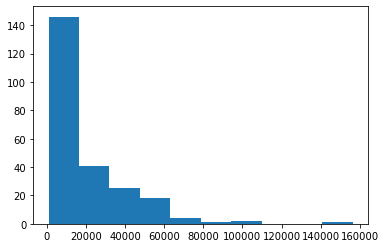

In [48]:
plt.hist(gdp_internet_2014.GDP_Per_Capita)

## 26. Look at the distribution of Internet Use for 2014. Is it unimodal?

### Answer: No, it is bimodal (0-20%, 40-50%).

(array([31., 31., 12., 10., 24., 18., 21., 20., 18., 17.]),
 array([ 0.   ,  9.816, 19.632, 29.448, 39.264, 49.08 , 58.896, 68.712,
        78.528, 88.344, 98.16 ]),
 <BarContainer object of 10 artists>)

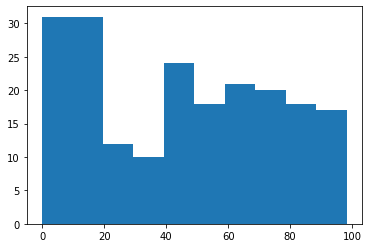

In [49]:
plt.hist(gdp_internet_2014.Internet_Users_Pct)

## 27. What are the top 5 countries in terms of internet use in 2014?

### Answer: Iceland, Bermuda, Norway, Denmark, Andorra

In [50]:
gdp_internet_2014.nlargest(5, ['Internet_Users_Pct'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3249,Iceland,2014,49652.149500,98.16
623,Bermuda,2014,77361.104881,96.80
5387,Norway,2014,62589.373548,96.30
1700,Denmark,2014,52214.537753,95.99
99,Andorra,2014,NaN,95.90


## 28. Create a DataFrame called top_5_internet from the combined DataFrame that has all three years for the 5 countries that had the greatest 2014 internet usage. You should have 15 rows. Check that this is true.

In [51]:
filter2 = gdp_and_internet_use['Country'].isin(['Iceland', 'Bermuda', 'Norway', 'Denmark', 'Andorra'])

In [52]:
top_5_internet = gdp_and_internet_use[filter2]

In [53]:
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
89    Andorra  2004             NaN           26.837954
94    Andorra  2009             NaN           78.530000
99    Andorra  2014             NaN           95.900000
613   Bermuda  2004    90195.811033           60.990867
618   Bermuda  2009    89961.982744           83.250000
623   Bermuda  2014    77361.104881           96.800000
1690  Denmark  2004    50607.628971           80.930000
1695  Denmark  2009    50274.075696           86.840000
1700  Denmark  2014    52214.537753           95.990000
3239  Iceland  2004    45145.545658           83.880000
3244  Iceland  2009    48177.084123           93.000000
3249  Iceland  2014    49652.149500           98.160000
5377   Norway  2004    60893.410993           77.690000
5382   Norway  2009    61886.564498           92.080000
5387   Norway  2014    62589.373548           96.300000


## 29. Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

### https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

### Answer: Andorra

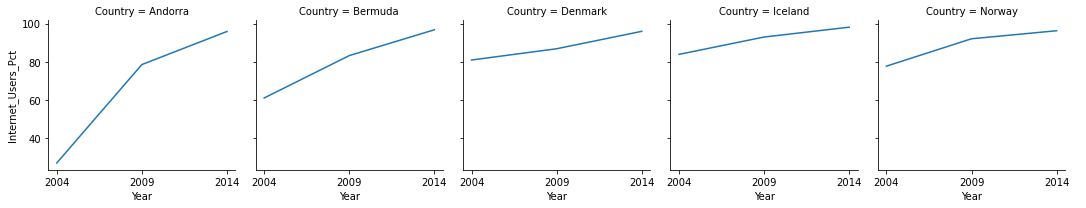

In [54]:
g = sns.FacetGrid(top_5_internet, col='Country')
g.map_dataframe(sns.lineplot, x='Year', y="Internet_Users_Pct").add_legend()

## 30. Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?

### Answer: Dem. People's Rep. of Korea

In [55]:
#bottom 5 countries in terms of internet use in 2014
gdp_internet_2014.nsmallest(5, ['Internet_Users_Pct'])

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1645,Dem. People's Rep. of Korea,2014,NaN,0.00
2071,Eritrea,2014,NaN,0.99
7161,Timor-Leste,2014,3264.568070,1.14
947,Burundi,2014,886.235777,1.38
6420,Somalia,2014,NaN,1.63


In [56]:
filter3 = gdp_and_internet_use['Country'].isin(["Dem. People's Rep. of Korea", 'Eritrea', 'Timor-Leste', 'Burundi', 'Somalia'])

In [57]:
bottom_5_internet = gdp_and_internet_use[filter3]

In [58]:
print(bottom_5_internet)

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
937                       Burundi  2004      817.460585            0.349060
942                       Burundi  2009      831.564131            0.900000
947                       Burundi  2014      886.235777            1.380000
1636  Dem. People's Rep. of Korea  2004             NaN            0.000000
1641  Dem. People's Rep. of Korea  2009             NaN            0.000000
1645  Dem. People's Rep. of Korea  2014             NaN            0.000000
2066                      Eritrea  2009             NaN            0.540000
2071                      Eritrea  2014             NaN            0.990000
6411                      Somalia  2004             NaN            1.053455
6416                      Somalia  2009             NaN            1.160611
6420                      Somalia  2014             NaN            1.630000
7151                  Timor-Leste  2004     2258.608056                 NaN
7156        

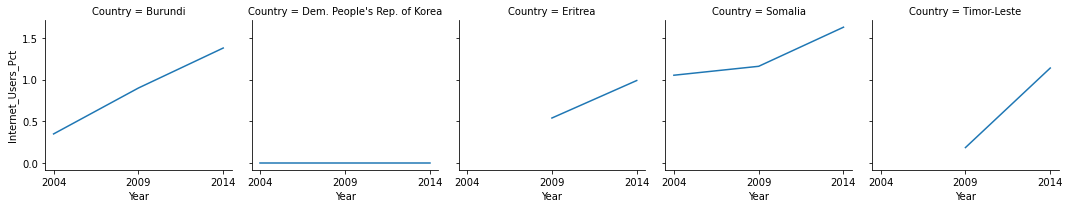

In [59]:
g2 = sns.FacetGrid(bottom_5_internet, col='Country')
g2.map_dataframe(sns.lineplot, x='Year', y="Internet_Users_Pct").add_legend()